In [23]:
from py_stringsimjoin.sampler.sample import sample_pairs
from py_stringsimjoin.feature.autofeaturegen import get_features
from py_stringsimjoin.feature.extractfeatures import extract_feature_vecs
from py_stringsimjoin.active_learner.active_learner import ActiveLearner
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import graphviz

In [24]:
#ldf=pd.read_csv('/scratch/songs/msd_reduced.csv').head(10000)
#rdf=pd.read_csv('/scratch/songs/msd_reduced.csv').head(10000)
ldf=pd.read_csv('/scratch/products_data/walmart_clean.csv')
rdf=pd.read_csv('/scratch/products_data/amazon_clean.csv')

In [25]:
rdf.head()['proddescrlong']

0    The pocket-size Koss 3-Band Equalizer delivers high-fidelity performance and output normally res...
1                                        Kodak Black Ink Cartridge 10B is a standard black ink cartridge
2                                                  1GB - 333MHz DDR333 PC2700 - DDR SDRAM - 184-pin DIMM
3    KINAMAX MS-UES2 Mini High Precision USB 3-Button 3D Optical Scroll Wheel Mouse with Retractable ...
4                                                                    Wireless MOUSE FOR NETBOOKS USBWRLS
Name: proddescrlong, dtype: object

In [26]:
c=sample_pairs(ldf,rdf,'custom_id','custom_id','longdescr','proddescrlong',500000, 100)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:00:13


In [27]:
ft = get_features()
fvs = extract_feature_vecs(c, 'l_custom_id','r_custom_id',ldf,rdf,'custom_id','custom_id','longdescr','proddescrlong',ft,n_jobs=4)

0%                          100%
[##############################] | ETA: 00:00:00
Total time elapsed: 00:03:39


In [28]:
fvs.head()
fvs[fvs['jaccard_ws']==0.97402597402597402]


,_id,l_custom_id,r_custom_id,jaccard_ws,cosine_ws,dice_ws,overlap_ws,overlap_coefficient_ws
1027,1027,167,8787,0.974026,0.986842,0.986842,75,0.986842
1055,1055,853,8787,0.974026,0.986842,0.986842,75,0.986842
1059,1059,2431,8787,0.974026,0.986842,0.986842,75,0.986842
1069,1069,2472,8787,0.974026,0.986842,0.986842,75,0.986842
9636,9636,167,20122,0.974026,0.986842,0.986842,75,0.986842
9669,9669,853,20122,0.974026,0.986842,0.986842,75,0.986842
9672,9672,2431,20122,0.974026,0.986842,0.986842,75,0.986842
9679,9679,2472,20122,0.974026,0.986842,0.986842,75,0.986842
50033,300033,167,802,0.974026,0.986842,0.986842,75,0.986842
50068,300068,853,802,0.974026,0.986842,0.986842,75,0.986842


In [29]:
rf=RandomForestClassifier(10)
al=ActiveLearner(rf, 20, 20, '/scratch/products_data/productsGold.csv', '/scratch/products_data/productsSeed.csv')
labels = (fvs['l_custom_id'].astype(str) + ',' +  fvs['r_custom_id'].astype(str)).apply(lambda val: al.gold_pairs.get(val, 0))

In [30]:
al.seed_pairs

{'1,1': 0, '1234,12408': 1, '2,2': 0, '395,1768': 1}

In [31]:
sum(labels)
#fvs[fvs.apply(lambda row: al.seed_pairs.get(str(row['l_custom_id']) + ',' + str(row['r_custom_id'])) != None, 1)]

155

In [33]:
al.learn(fvs, '_id', 'l_custom_id','r_custom_id')

KeyError: ('l_custom_id', u'occurred at index l_custom_id')

In [43]:
al.matcher.classes_

array([0])

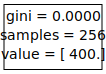

In [42]:
feature_attrs=['jaccard_ws', 'cosine_ws', 'dice_ws', 'overlap_ws', 'overlap_coefficient_ws']
export_graphviz(al.matcher.estimators_[2], out_file="mytree.dot", feature_names=feature_attrs)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
